# Average Baseline + Linear Regression

This notebook inclues the Average Baseline Model and the Linear Regression Model.

The sections are:<br>
-Data Cleaning <br>
-Linear Regression <br>
-Average Baseline <br>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

2023-04-17 16:47:02.535761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Cleaning

In [2]:
df_raw = pd.read_csv('games-features.csv')

In [3]:
df_raw.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


### Selecting rows and columns used for analysis

In [4]:
df_raw.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

In [5]:
df_all = df_raw[['QueryName', 'Metacritic',
         #Genre variables
        'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 
         'GenreIsCasual','GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
         #Category variables
        'CategorySinglePlayer','CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport',
         #Platform variables
        'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec',
         #Additional Info
        'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount',
        'MovieCount', 'PackageCount', 'RecommendationCount', 
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance','SteamSpyPlayersEstimate', 
         'SteamSpyPlayersVariance','AchievementCount', 'ControllerSupport', 'FreeVerAvail', 
         'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal',
         #Variables that need transformation
         'ReleaseDate', 'SupportedLanguages', 
         #Text variables
         'Reviews','DetailedDescrip','AboutText']]

In [6]:
df = df_all[df_all['Metacritic']>0]

### Dropping Duplicates

In [7]:
df = df.drop_duplicates()

In [8]:
df_vc = pd.DataFrame(df['QueryName'].value_counts())
df_vc[df_vc['QueryName']>1]

,QueryName
Sid Meier's Civilization IV: Colonization,2
Monday Night Combat,2
Fallout: New Vegas,2
Darksiders,2
Alpha Protocol,2
Sid Meier's Civilization V,2
Sid Meier's Civilization IV: Beyond the Sword,2
Sid Meier's Civilization IV: Warlords,2
Arma 2,2
Sid Meier's Civilization IV,2


In [9]:
#drop Sid Meier's Civilization IV: Colonization dup 
df=df.drop(965)
#drop Fallout: New Vegas dup
df=df.drop(952)
#drop Sid Meier's Civilization V dup
df=df.drop(1205)
#drop Darksiders dup
df=df.drop(1210)
#drop Sid Meier's Civilization IV dup
df=df.drop(962)
#Drop Monday night combat dup
df=df.drop(1278)
#Drop Sid Meier's Civilization IV: Beyond the Sword dup
df=df.drop(964)
#Drop Sid Meier's Civilization IV: Warlords dup
df=df.drop(963)
#Drop Arma 2 dup
df=df.drop(782)
#Drop Alpha Protocol dup
df=df.drop(961)

### Cleaning Languages

In [10]:
import re
pd.set_option('display.max_rows', None)
languages = df['SupportedLanguages'].tolist()

#Split to check all languages
split_lst = []
for language in languages:
    split_lang = re.split('\* |\*|\s|\*\*', language)
    for lang in split_lang:
        split_lst.append(lang)

split_series = pd.Series(split_lst)
split_df = pd.DataFrame(split_series.value_counts())
#split_df[split_df[0]>0]
#lang_list= split_df.index.values.tolist()
#print(lang_list)

In [11]:
#Create list of all possible languages
language_list=['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']

In [12]:
#Create boolean columns for each language
for language in language_list:
    df[language]=df['SupportedLanguages'].str.contains(language)

In [13]:
#create boolean column for audio support (will delete later, using this as reference to check regex)
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==True, 'audio_support?'] = 1
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==False, 'audio_support?'] = 0

In [14]:
#Create transformed language columns without "languages with full audio support" statement
df['transformed']= df['SupportedLanguages'].str.extract("(.+?)\*languages with full audio support")

In [15]:
#Count * in transformed column to count number of languages with audio support
df['num_lang_audio_support']=df['transformed'].str.count('\*')
df['num_lang_audio_support'] = df['num_lang_audio_support'].fillna(0)

In [16]:
#Convert bool to numeric and sum
df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']] = df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].replace({True: 1, False: 0})

df['num_languages']=df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].sum(axis=1)

In [17]:
#Drop columns used in transformations
df=df.drop("transformed", axis=1)
df=df.drop("audio_support?", axis=1)

In [18]:
pd.set_option('display.max_columns', None)
df.head(100)

,QueryName,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,SupportedLanguages,Reviews,DetailedDescrip,AboutText,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
0,Counter-Strike,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,Nov 1 2000,English French German Italian Spanish Simplifi...,,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
2,Day of Defeat,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,May 1 2003,English French German Italian Spanish,,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5
6,Half-Life,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,Nov 8 1998,English French German Italian Spanish Simplifi...,,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
7,Counter-Strike: Condition Zero,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,Mar 1 2004,English French German Italian Spanish Simplifi...,,With its extensive Tour of Duty campaign a nea...,With its extensive Tour of Duty campaign a nea...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
9,Half-Life: Blue Shift,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,Jun 1 2001,English French German,,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3
10,Half-Life 2,96,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False,0,1,1,1,2,2,35792,9,9901173,81234,5695963,61979,33,False,False,True,False,9.99,Nov 16 2004,English* French* German* Italian* Korean* Span...,,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1,1,1,1,1,1,1,1,0,0

### Cleaning Dates

In [19]:
#Check for dates with inaccurate format
df['ReleaseDate'][df['ReleaseDate'].str.fullmatch('[a-zA-Z]{3}\s\d*?\s\d{4}')==False]

305                Feb 2011
529                        
572                        
668                Jun 2009
687                Jul 2010
904                Sep 2009
1008                       
1180               Mar 2010
1199                       
1228               Apr 2010
1253               Jul 2010
1268               Oct 2010
1269               Oct 2010
1578                       
1856                       
1922                       
1993                       
2171                       
2183                       
2201                       
2214                       
2317               Aug 2013
3805               Nov 2014
4103               May 2015
4943               Jun 2015
12068    December 20th 2016
Name: ReleaseDate, dtype: object

In [20]:
#Convert these dates to accurate format, replace blanks with NAs
df['ReleaseDate']= df['ReleaseDate'].replace({'Oct 2010': 'Oct 1 2010', 'Jul 2010':'Jul 1 2010', 'Aug 2013': 'Aug 2013',
                          'Jun 2015': 'Jun 1 2015', 'December 20th 2016': 'Dec 20 2016',
                          'May 2015': 'May 1 2015', 'Nov 2014': 'Nov 1 2014', 'Sep 2009':'Sep 1 2009',
                          'Jun 2009': 'Jun 1 2009', 'Feb 2011':'Feb 1 2011', 'Mar 2010':'Mar 1 2010',
                          'Apr 2010': 'Apr 1 2010', 'Aug 2013': 'Aug 1 2013'})
df['ReleaseDate'] = df['ReleaseDate'].replace(r'^\s*$', np.nan, regex=True)

In [21]:
#Convert to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [22]:
#check data type
df['ReleaseDate'].dtype

dtype('<M8[ns]')

In [23]:
df.describe()

,Metacritic,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,PriceFinal,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2235.000000,2235.000000,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.00000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,72.008501,2.508277,0.186577,1.087696,1.502013,1.798210,1.680984,4.552546e+03,11.968680,5.867512e+05,13742.305145,4.127886e+05,10733.005369,26.519911,14.024385,1.0,0.607159,0.587472,0.532886,0.474273,0.351678,0.234004,0.161074,0.153020,0.085906,0.078747,0.076510,0.069799,0.05906,0.187919,0.051007,0.044743,0.036242,0.032215,0.029083,0.027740,0.015660,0.013870,0.008949,0.008949,0.008949,0.008501,0.000447,1.216555,4.945861
std,11.152135,5.984335,0.391950,0.362037,5.995998,1.829089,1.023349,3.541729e+04,7.336697,2.455699e+06,14185.781091,2.313979e+06,12541.438116,53.770134,10.488378,0.0,0.488491,0.492399,0.499029,0.499449,0.477601,0.423470,0.367681,0.360087,0.280288,0.269404,0.265872,0.254864,0.23579,0.390735,0.220061,0.206785,0.186933,0.176610,0.168076,0.164265,0.124184,0.116979,0.094194,0.094194,0.094194,0.091829,0.021152,2.172011,4.165792
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,66.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.370000e+02,8.000000,3.560100e+04,4938.000000,1.721800e+04,3434.000000,0.000000,8.365000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,73.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.180000e+02,10.000000,1.303870e+05,9449.000000,6.725600e+04,6787.000000,15.000000,9.990000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,80.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.118500e+03,14.000000,4.602110e+05,17745.000000,2.679480e+05,13543.500000,39.000000,19.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
max,96.000000,18.000000,2.000000,5.000000,169.000000,20.000000,11.000000,1.427633e+06,114.000000,9.068758e+07,215972.000000,9.068758e+07,215972.000000,1448.000000,99.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

# Linear Regression

In [24]:
#select columns to work with for linear regression
df_lr = df[['Metacritic', 'GenreIsNonGame', 'GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy',
       'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
       'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
       'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'PlatformWindows',
       'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
       'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
       'MacReqsHaveRec', 'RequiredAge', 'DemoCount', 'DeveloperCount',
       'DLCCount', 'MovieCount', 'PackageCount', 'RecommendationCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'ControllerSupport', 'FreeVerAvail',
       'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal', 'ReleaseDate',
       'English', 'German', 'French', 'Spanish', 'Italian', 'Russian',
       'Polish', 'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean',
       'Simplified Chinese', 'Dutch', 'Traditional Chinese', 'Portuguese',
       'Hungarian', 'Turkish', 'Swedish', 'Danish', 'Norwegian', 'Finnish',
       'Ukrainian', 'Romanian', 'Thai', 'Greek', 'Bulgarian', 'Arabic',
       'Slovakian', 'num_lang_audio_support']]

In [25]:
df_lr = df_lr.dropna()
df_lr.head()

,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support
0,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,2000-11-01,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,2003-05-01,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
6,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,1998-11-08,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
7,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,2004-03-01,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
9,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,2001-06-01,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [26]:
#make column for age
now = pd.to_datetime('now')
df_lr['Age']=(now - df['ReleaseDate']).dt.total_seconds() / (60*60*24*365.25)

In [27]:
#make columns for month, drop date column
#df_lr['Year'] = df_lr['ReleaseDate'].dt.year 
df_lr['Month'] = df_lr['ReleaseDate'].dt.month_name()
df_lr=df_lr.drop('ReleaseDate', axis=1)

In [28]:
#Make dummy variables for months
df_lr = pd.concat([df_lr, pd.get_dummies(df_lr['Month'])], axis=1)
df_lr = df_lr.drop('Month', axis=1)

In [29]:
#Make booleans numeric
df_lr=df_lr.replace({True: 1, False: 0})

In [30]:
#Shuffle rows
df_lr_shuffled= df_lr.sample(frac=1, random_state=1).reset_index()
df_lr_shuffled.shape

(2223, 91)

In [31]:
# select features for training
features = ['GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
        'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
        'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
        'GenreIsSports', 'GenreIsRacing', 'CategorySinglePlayer',
        'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
        'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
        'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'PlatformWindows',
        'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
        'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
        'MacReqsHaveRec', 'RequiredAge', 'DemoCount', 'DeveloperCount',
        'DLCCount', 'MovieCount', 'PackageCount', 'RecommendationCount',
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
        'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
        'AchievementCount', 'ControllerSupport', 'FreeVerAvail',
        'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal', 'English', 'German',
        'French', 'Spanish', 'Italian', 'Russian', 'Polish', 'Japanese',
        'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 'Dutch',
        'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish',
        'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai',
        'Greek', 'Bulgarian', 'Arabic', 'Slovakian', 'num_lang_audio_support',
        'Age', 'April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'October', 'September']

# Use a ~80/20 train/test split.
lr_train = df_lr_shuffled[:1835]
lr_test = df_lr_shuffled[1835:]

# Create separate variables for features (inputs) and labels (outputs).
# We will be using these in the cells below.
X_train = lr_train[features].values
X_test = lr_test[features].values
y_train = lr_train['Metacritic'].values
y_test = lr_test['Metacritic'].values

# Confirm the data shapes are as expected.
print('train data shape:', X_train.shape)
print('train labels shape:', y_train.shape)
print('test data shape:', X_test.shape)
print('test labels shape:', y_test.shape)

train data shape: (1835, 89)
train labels shape: (1835,)
test data shape: (388, 89)
test labels shape: (388,)


In [32]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [33]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1835, 89)
(388, 89)


In [34]:
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

2023-04-17 16:47:07.413356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1651/1651 [==============================] - 1s 524us/step - loss: 4875.8569 - val_loss: 3436.6240
Epoch 2/10
1651/1651 [==============================] - 1s 475us/step - loss: 3108.6577 - val_loss: 2139.4233
Epoch 3/10
1651/1651 [==============================] - 1s 474us/step - loss: 1948.2236 - val_loss: 1197.7551
Epoch 4/10
1651/1651 [==============================] - 1s 481us/step - loss: 1180.0443 - val_loss: 638.2001
Epoch 5/10
1651/1651 [==============================] - 1s 481us/step - loss: 746.2979 - val_loss: 316.1494
Epoch 6/10
1651/1651 [==============================] - 1s 476us/step - loss: 536.5552 - val_loss: 194.1320
Epoch 7/10
1651/1651 [==============================] - 1s 476us/step - loss: 452.1873 - val_loss: 144.7231
Epoch 8/10
1651/1651 [==============================] - 1s 489us/step - loss: 413.5288 - val_loss: 127.8358
Epoch 9/10
1651/1651 [==============================] - 1s 484us/step - loss: 387.8952 - val_loss: 123.9061
Epoch 10/10
1651/1651

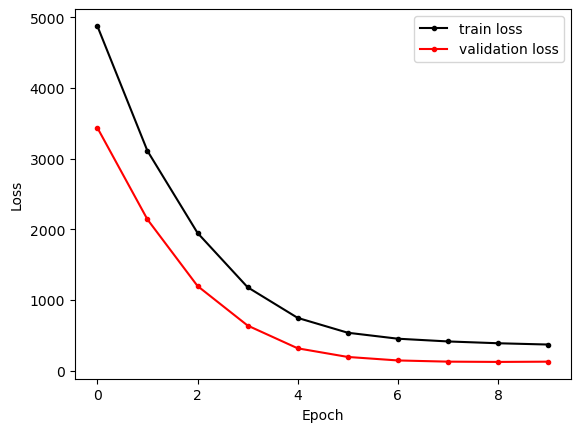

Final train loss: 369.7183837890625
Final test loss: 127.41799926757812


,loss,val_loss
0,4875.856934,3436.624023
1,3108.657715,2139.423340
2,1948.223633,1197.755127
3,1180.044312,638.200134
4,746.297852,316.149414
5,536.555176,194.132050
6,452.187317,144.723068
7,413.528839,127.835838
8,387.895172,123.906105
9,369.718384,127.417999


In [35]:
def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=10,
  batch_size=1,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

## Linear Regression Experiments

Epoch 1/10
207/207 [==============================] - 0s 872us/step - loss: 5175.8872 - val_loss: 5239.2886
Epoch 2/10
207/207 [==============================] - 0s 614us/step - loss: 4865.7676 - val_loss: 4985.5454
Epoch 3/10
207/207 [==============================] - 0s 604us/step - loss: 4583.8374 - val_loss: 4733.7588
Epoch 4/10
207/207 [==============================] - 0s 634us/step - loss: 4317.6812 - val_loss: 4488.5977
Epoch 5/10
207/207 [==============================] - 0s 625us/step - loss: 4060.5730 - val_loss: 4248.1714
Epoch 6/10
207/207 [==============================] - 0s 632us/step - loss: 3816.1641 - val_loss: 4013.8579
Epoch 7/10
207/207 [==============================] - 0s 616us/step - loss: 3585.0669 - val_loss: 3790.5852
Epoch 8/10
207/207 [==============================] - 0s 655us/step - loss: 3362.0378 - val_loss: 3581.9375
Epoch 9/10
207/207 [==============================] - 0s 622us/step - loss: 3148.9724 - val_loss: 3376.5371
Epoch 10/10
207/207 [=======

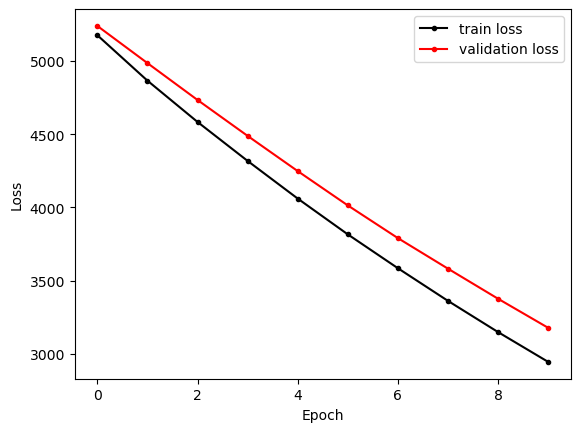

Final train loss: 2945.551513671875
Final test loss: 3178.098876953125


,loss,val_loss
0,5175.887207,5239.288574
1,4865.767578,4985.545410
2,4583.837402,4733.758789
3,4317.681152,4488.597656
4,4060.572998,4248.171387
5,3816.164062,4013.857910
6,3585.066895,3790.585205
7,3362.037842,3581.937500
8,3148.972412,3376.537109
9,2945.551514,3178.098877


In [36]:
#Batch size 8
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=10,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/15
207/207 [==============================] - 0s 907us/step - loss: 5001.1870 - val_loss: 3054.5886
Epoch 2/15
207/207 [==============================] - 0s 614us/step - loss: 2763.0835 - val_loss: 1695.5476
Epoch 3/15
207/207 [==============================] - 0s 607us/step - loss: 1556.8115 - val_loss: 909.3610
Epoch 4/15
207/207 [==============================] - 0s 610us/step - loss: 904.1982 - val_loss: 493.7183
Epoch 5/15
207/207 [==============================] - 0s 624us/step - loss: 578.3486 - val_loss: 273.2758
Epoch 6/15
207/207 [==============================] - 0s 634us/step - loss: 424.2669 - val_loss: 174.1852
Epoch 7/15
207/207 [==============================] - 0s 627us/step - loss: 346.1738 - val_loss: 147.4085
Epoch 8/15
207/207 [==============================] - 0s 631us/step - loss: 295.2191 - val_loss: 146.0492
Epoch 9/15
207/207 [==============================] - 0s 643us/step - loss: 258.8380 - val_loss: 127.4252
Epoch 10/15
207/207 [====================

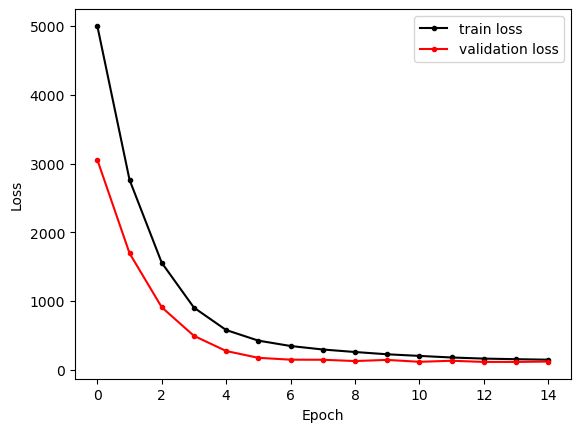

Final train loss: 146.93792724609375
Final test loss: 119.46926879882812


,loss,val_loss
0,5001.187012,3054.588623
1,2763.083496,1695.547607
2,1556.811523,909.360962
3,904.198242,493.718323
4,578.348572,273.275787
5,424.266907,174.185165
6,346.173767,147.408524
7,295.219086,146.049164
8,258.838043,127.425232
9,225.686386,144.004074


In [37]:
#Batch size 8, LR 0.1
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=15,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/60
207/207 [==============================] - 0s 919us/step - loss: 5171.4658 - val_loss: 5246.4224
Epoch 2/60
207/207 [==============================] - 0s 651us/step - loss: 4863.1353 - val_loss: 4991.5249
Epoch 3/60
207/207 [==============================] - 0s 613us/step - loss: 4582.0596 - val_loss: 4739.2100
Epoch 4/60
207/207 [==============================] - 0s 603us/step - loss: 4316.3374 - val_loss: 4493.6138
Epoch 5/60
207/207 [==============================] - 0s 629us/step - loss: 4059.6526 - val_loss: 4252.8442
Epoch 6/60
207/207 [==============================] - 0s 648us/step - loss: 3815.3267 - val_loss: 4018.0566
Epoch 7/60
207/207 [==============================] - 0s 637us/step - loss: 3584.4324 - val_loss: 3794.3896
Epoch 8/60
207/207 [==============================] - 0s 628us/step - loss: 3361.4282 - val_loss: 3585.4697
Epoch 9/60
207/207 [==============================] - 0s 656us/step - loss: 3148.4912 - val_loss: 3379.6125
Epoch 10/60
207/207 [=======

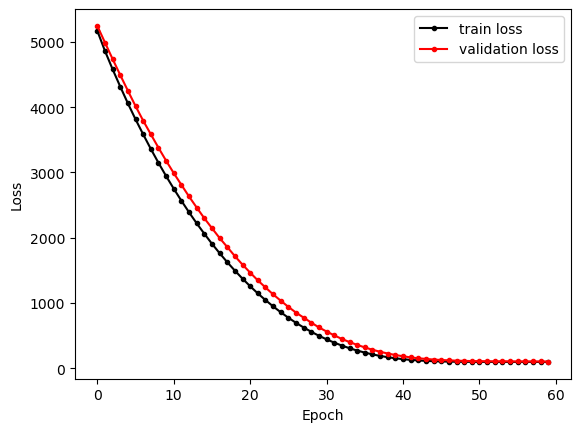

Final train loss: 97.09313201904297
Final test loss: 102.478515625


,loss,val_loss
0,5171.465820,5246.422363
1,4863.135254,4991.524902
2,4582.059570,4739.209961
3,4316.337402,4493.613770
4,4059.652588,4252.844238
5,3815.326660,4018.056641
6,3584.432373,3794.389648
7,3361.428223,3585.469727
8,3148.491211,3379.612549
9,2945.177979,3180.713379


In [38]:
#Batch size 8, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=60,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/35
413/413 [==============================] - 0s 689us/step - loss: 5075.6699 - val_loss: 4949.7671
Epoch 2/35
413/413 [==============================] - 0s 553us/step - loss: 4489.6812 - val_loss: 4453.6880
Epoch 3/35
413/413 [==============================] - 0s 547us/step - loss: 3979.4172 - val_loss: 3987.2344
Epoch 4/35
413/413 [==============================] - 0s 566us/step - loss: 3512.9819 - val_loss: 3553.9990
Epoch 5/35
413/413 [==============================] - 0s 549us/step - loss: 3085.4365 - val_loss: 3144.8640
Epoch 6/35
413/413 [==============================] - 0s 555us/step - loss: 2693.7429 - val_loss: 2763.8328
Epoch 7/35
413/413 [==============================] - 0s 557us/step - loss: 2341.6880 - val_loss: 2421.0227
Epoch 8/35
413/413 [==============================] - 0s 555us/step - loss: 2018.7670 - val_loss: 2112.1025
Epoch 9/35
413/413 [==============================] - 0s 579us/step - loss: 1727.1340 - val_loss: 1824.6583
Epoch 10/35
413/413 [=======

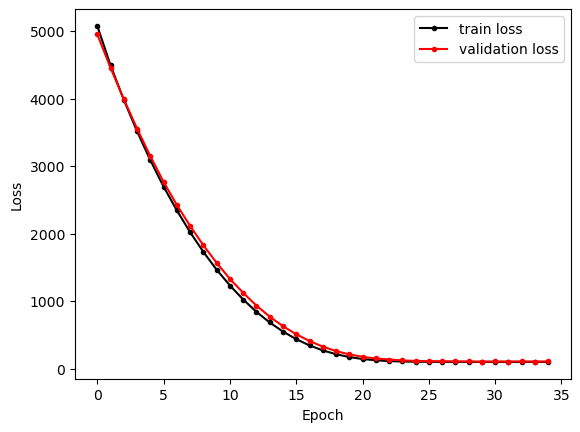

Final train loss: 98.21090698242188
Final test loss: 104.62234497070312


,loss,val_loss
0,5075.669922,4949.767090
1,4489.681152,4453.687988
2,3979.417236,3987.234375
3,3512.981934,3553.999023
4,3085.436523,3144.864014
5,2693.742920,2763.832764
6,2341.687988,2421.022705
7,2018.766968,2112.102539
8,1727.134033,1824.658325
9,1463.857544,1565.026489


In [39]:
#Batch size 4, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=35,
  batch_size=4,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/150
104/104 [==============================] - 0s 1ms/step - loss: 5227.6558 - val_loss: 5397.6240
Epoch 2/150
104/104 [==============================] - 0s 741us/step - loss: 5066.9648 - val_loss: 5271.1367
Epoch 3/150
104/104 [==============================] - 0s 749us/step - loss: 4916.8950 - val_loss: 5140.6260
Epoch 4/150
104/104 [==============================] - 0s 751us/step - loss: 4774.2383 - val_loss: 5010.5620
Epoch 5/150
104/104 [==============================] - 0s 751us/step - loss: 4631.1606 - val_loss: 4883.4224
Epoch 6/150
104/104 [==============================] - 0s 739us/step - loss: 4494.6577 - val_loss: 4757.0708
Epoch 7/150
104/104 [==============================] - 0s 739us/step - loss: 4360.7588 - val_loss: 4632.3955
Epoch 8/150
104/104 [==============================] - 0s 747us/step - loss: 4229.5410 - val_loss: 4513.7173
Epoch 9/150
104/104 [==============================] - 0s 732us/step - loss: 4100.9336 - val_loss: 4397.0352
Epoch 10/150
104/104 

104/104 [==============================] - 0s 725us/step - loss: 177.4612 - val_loss: 243.6903
Epoch 77/150
104/104 [==============================] - 0s 695us/step - loss: 167.9855 - val_loss: 230.5704
Epoch 78/150
104/104 [==============================] - 0s 695us/step - loss: 159.1529 - val_loss: 218.2295
Epoch 79/150
104/104 [==============================] - 0s 692us/step - loss: 151.1075 - val_loss: 206.3188
Epoch 80/150
104/104 [==============================] - 0s 690us/step - loss: 144.0945 - val_loss: 195.8098
Epoch 81/150
104/104 [==============================] - 0s 703us/step - loss: 137.5478 - val_loss: 185.8365
Epoch 82/150
104/104 [==============================] - 0s 718us/step - loss: 131.7633 - val_loss: 176.9666
Epoch 83/150
104/104 [==============================] - 0s 723us/step - loss: 126.6730 - val_loss: 168.8158
Epoch 84/150
104/104 [==============================] - 0s 725us/step - loss: 122.0069 - val_loss: 161.6787
Epoch 85/150
104/104 [===================

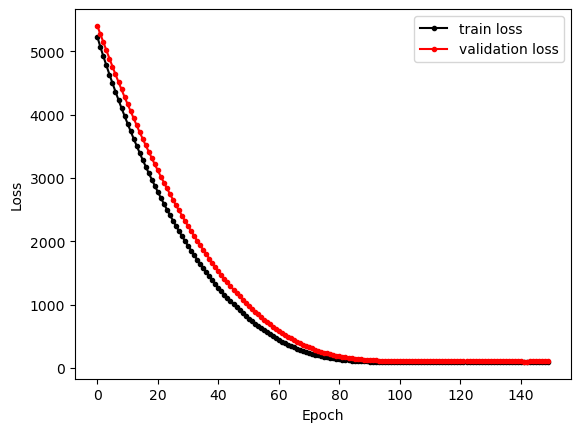

Final train loss: 96.56714630126953
Final test loss: 103.04241943359375


,loss,val_loss
0,5227.655762,5397.624023
1,5066.964844,5271.136719
2,4916.895020,5140.625977
3,4774.238281,5010.562012
4,4631.160645,4883.422363
5,4494.657715,4757.070801
6,4360.758789,4632.395508
7,4229.541016,4513.717285
8,4100.933594,4397.035156
9,3976.135010,4276.247070


In [40]:
#Batch size 16, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=150,
  batch_size=16,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/180
26/26 [==============================] - 0s 3ms/step - loss: 5049.7539 - val_loss: 5031.4028
Epoch 2/180
26/26 [==============================] - 0s 1ms/step - loss: 4552.2192 - val_loss: 4575.2212
Epoch 3/180
26/26 [==============================] - 0s 1ms/step - loss: 4107.7861 - val_loss: 4160.2612
Epoch 4/180
26/26 [==============================] - 0s 1ms/step - loss: 3709.1396 - val_loss: 3784.9578
Epoch 5/180
26/26 [==============================] - 0s 1ms/step - loss: 3350.2646 - val_loss: 3441.9824
Epoch 6/180
26/26 [==============================] - 0s 1ms/step - loss: 3026.6396 - val_loss: 3129.8125
Epoch 7/180
26/26 [==============================] - 0s 1ms/step - loss: 2737.0078 - val_loss: 2848.8171
Epoch 8/180
26/26 [==============================] - 0s 1ms/step - loss: 2475.0210 - val_loss: 2595.1052
Epoch 9/180
26/26 [==============================] - 0s 1ms/step - loss: 2239.4788 - val_loss: 2365.4087
Epoch 10/180
26/26 [==============================] - 0

26/26 [==============================] - 0s 1ms/step - loss: 97.7283 - val_loss: 112.2468
Epoch 80/180
26/26 [==============================] - 0s 1ms/step - loss: 97.5640 - val_loss: 111.7494
Epoch 81/180
26/26 [==============================] - 0s 1ms/step - loss: 97.4150 - val_loss: 111.2869
Epoch 82/180
26/26 [==============================] - 0s 1ms/step - loss: 97.2683 - val_loss: 110.8499
Epoch 83/180
26/26 [==============================] - 0s 1ms/step - loss: 97.1428 - val_loss: 110.4205
Epoch 84/180
26/26 [==============================] - 0s 1ms/step - loss: 97.0126 - val_loss: 110.0822
Epoch 85/180
26/26 [==============================] - 0s 2ms/step - loss: 96.9175 - val_loss: 109.7389
Epoch 86/180
26/26 [==============================] - 0s 1ms/step - loss: 96.8182 - val_loss: 109.3967
Epoch 87/180
26/26 [==============================] - 0s 1ms/step - loss: 96.7056 - val_loss: 109.0498
Epoch 88/180
26/26 [==============================] - 0s 1ms/step - loss: 96.6470 - va

26/26 [==============================] - 0s 1ms/step - loss: 95.4632 - val_loss: 103.4084
Epoch 159/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4738 - val_loss: 103.3825
Epoch 160/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4406 - val_loss: 103.3689
Epoch 161/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4543 - val_loss: 103.3699
Epoch 162/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4548 - val_loss: 103.3551
Epoch 163/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4456 - val_loss: 103.3557
Epoch 164/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4289 - val_loss: 103.3468
Epoch 165/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4335 - val_loss: 103.3308
Epoch 166/180
26/26 [==============================] - 0s 1ms/step - loss: 95.4343 - val_loss: 103.3294
Epoch 167/180
26/26 [==============================] - 0s 1ms/step - loss: 95.

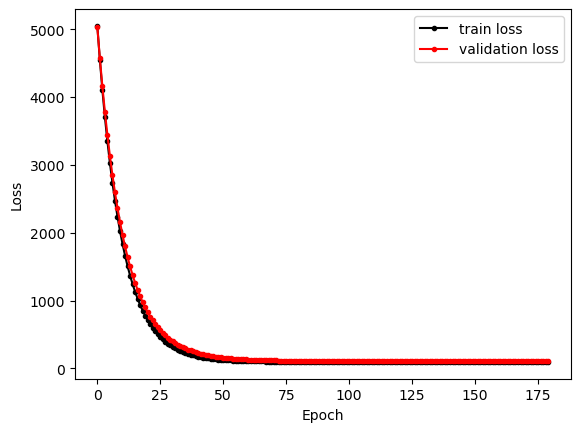

Final train loss: 95.38483428955078
Final test loss: 103.2426986694336


,loss,val_loss
0,5049.753906,5031.402832
1,4552.219238,4575.221191
2,4107.786133,4160.261230
3,3709.139648,3784.957764
4,3350.264648,3441.982422
5,3026.639648,3129.812500
6,2737.007812,2848.817139
7,2475.020996,2595.105225
8,2239.478760,2365.408691
9,2027.144287,2157.800049


In [41]:
#SGD
#Batch size 4, increase epochs
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=180,
  batch_size=64,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

EPOCHS | BATCH | OPTIMIZER | LEARNING RATE | VAL LOSS
-|-|-|-|-
10|1|Adam|0.01|126.35
10|8|Adam|0.01|3179.30
10|8|Adam|0.1|143.66
15|8|Adam|0.1|119.46
60|8|Adam|0.01|102.55
30|4|Adam|0.01|104.56
150|15|Adam|0.01|103.03
10|10|SGD|0.001|126
20|10|SGD|0.001|104.80
100|32|SGD|0.001|103.28
150|64|SGD|0.001|103.42




## Evaluate

Epoch 1/60
207/207 [==============================] - 0s 964us/step - loss: 5176.1279 - val_loss: 5223.5591
Epoch 2/60
207/207 [==============================] - 0s 603us/step - loss: 4865.2646 - val_loss: 4970.6528
Epoch 3/60
207/207 [==============================] - 0s 606us/step - loss: 4583.2881 - val_loss: 4720.0898
Epoch 4/60
207/207 [==============================] - 0s 611us/step - loss: 4317.0171 - val_loss: 4475.5723
Epoch 5/60
207/207 [==============================] - 0s 585us/step - loss: 4060.0896 - val_loss: 4236.0776
Epoch 6/60
207/207 [==============================] - 0s 624us/step - loss: 3815.6296 - val_loss: 4002.4277
Epoch 7/60
207/207 [==============================] - 0s 619us/step - loss: 3584.5969 - val_loss: 3779.9185
Epoch 8/60
207/207 [==============================] - 0s 615us/step - loss: 3361.5315 - val_loss: 3572.0164
Epoch 9/60
207/207 [==============================] - 0s 615us/step - loss: 3148.5090 - val_loss: 3367.3423
Epoch 10/60
207/207 [=======

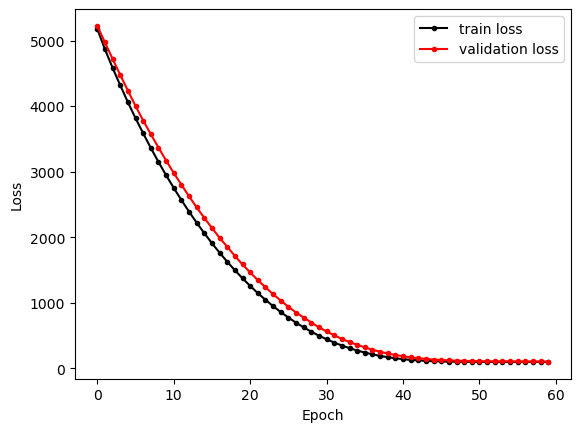

Final train loss: 97.12142944335938
Final test loss: 102.51094055175781


,loss,val_loss
0,5176.127930,5223.559082
1,4865.264648,4970.652832
2,4583.288086,4720.089844
3,4317.017090,4475.572266
4,4060.089600,4236.077637
5,3815.629639,4002.427734
6,3584.596924,3779.918457
7,3361.531494,3572.016357
8,3148.509033,3367.342285
9,2945.096680,3169.551514


In [42]:
#Batch size 8, 60 epochs, Adam Optimizer
def build_model(num_features):
    """Return a simple linear regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

  # Use Keras Sequential API to build a linear regression model.
    model = tf.keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,),
         name='Input'
    ))
    

    # create output layer
    model.add(tf.keras.layers.Dense(
      activation = None,          # linear activation is used
      units=1,                    # there is a single output
      use_bias=True               # include a learned bias parameter
      ))
  
  # Use mean squared error as our loss and the Adam optimizer.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Build a model
model = build_model(num_features=X_train_scaled.shape[1])

def plot_loss(model, history):
    """Plot the loss after each training epoch."""
    # Convert the history object into a DataFrame.
    history = pd.DataFrame(history.history)

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(len(history)), history['loss'], marker='.', color='black')
    plt.plot(range(len(history)), history['val_loss'], marker='.', color='red')
    plt.legend(['train loss', 'validation loss'])
    plt.show()

  # Show the final train loss value and the learned model weights.
    print('Final train loss:', list(history['loss'])[-1])
    print('Final test loss:', list(history['val_loss'])[-1])
    #print('Final weights:', model.layers[0].get_weights())
    
history = model.fit(
  x = X_train_scaled,
  y = y_train,
  epochs=60,
  batch_size=8,
  validation_split=0.1,
  verbose=1
)

plot_loss(model, history)

history = pd.DataFrame(history.history)
display(history)

In [43]:
test_results = model.evaluate(
    X_test_scaled,
    y_test, verbose=0)

print("MSE for test data:")
print(test_results)

MSE for test data:
83.06938171386719


In [49]:
y_pred = model.predict(X_test_scaled)
y_test.shape

13/13 [==============================] - 0s 616us/step


(388,)

13/13 [==============================] - 0s 668us/step


Text(0.5, 1.0, 'Plot of Predicted vs. Actual Values')

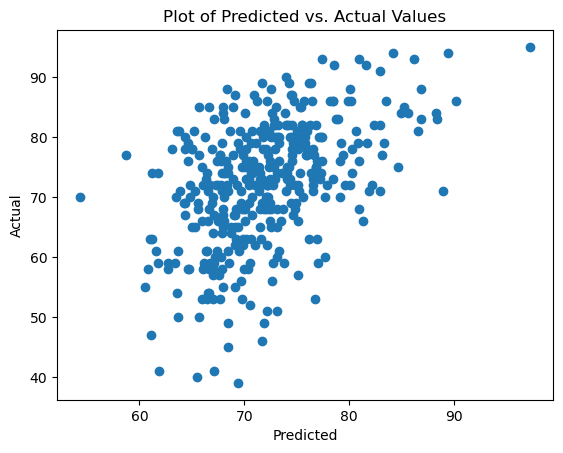

In [53]:
#Create plot of predicted vs. actual
y_pred = model.predict(X_test_scaled)

plt.scatter(y_pred,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Plot of Predicted vs. Actual Values')

# Baseline Model using Average Metacritic Score

In [44]:
# Baseling model to check MSE for data
avg_metacritic = np.mean(y_train)

def baseline_pred(col_num):
    return (np.ones(col_num)*avg_metacritic)

y_pred_train = baseline_pred(len(y_train))
y_pred_test = baseline_pred(len(y_test))

def MSE_baseline(predictions, outputs):
    diff = predictions - outputs
    MSE = (diff**2).sum()/len(predictions)
    return MSE

MSE_train_baseline = MSE_baseline(y_pred_train, y_train)
MSE_test_baseline = MSE_baseline(y_pred_test, y_test)

print("MSE of for the baseline on the training data: ", round(MSE_train_baseline,2))
print("MSE of for the baseline on the test data: ", round(MSE_test_baseline,2))

MSE of for the baseline on the training data:  128.01
MSE of for the baseline on the test data:  106.63


Text(0.5, 1.0, 'Histogram of Metacritic Score')

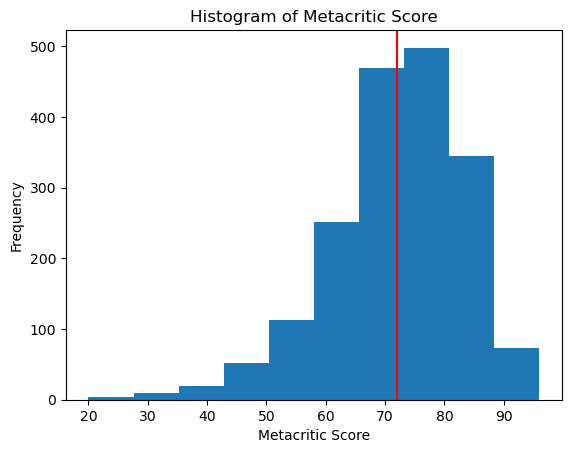

In [45]:
plt.hist(y_train)
plt.axvline(y_train.mean(), color='red')
plt.xlabel("Metacritic Score")
plt.ylabel("Frequency")
plt.title("Histogram of Metacritic Score")